# Project 2: Continuous Control

![SegmentLocal](robotic_arms.gif "segment")

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
!pip install -U torch==1.1.0

Requirement already up-to-date: torch==1.1.0 in ./anaconda3/envs/python3/lib/python3.6/site-packages (1.1.0)
Requirement not upgraded as not directly required: numpy in ./anaconda3/envs/python3/lib/python3.6/site-packages (from torch==1.1.0) (1.14.3)
unityagents 0.4.0 has requirement torch==0.4.0, but you'll have torch 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install gym

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque
from ddpg_agent import Agent

#import workspace_utils

## 2. Single Agent Environment

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print(np.shape(states))
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
(20, 33)
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


Initializing the agents. Here, only one agent is created.

In [6]:
agents =[] 
for i in range(num_agents):
    agents.append(Agent(state_size=state_size, action_size=action_size, random_seed=2))

The DDPG function definition

Episode 1	Score: 0.00	Average Score: 0.00.00
Episode 2	Score: 0.00	Average Score: 0.00.00
Episode 3	Score: 0.28	Average Score: 0.09.28
Episode 4	Score: 0.06	Average Score: 0.08.06
Episode 5	Score: 0.00	Average Score: 0.07.00
Episode 6	Score: 0.12	Average Score: 0.08.12
Episode 7	Score: 0.00	Average Score: 0.07.00
Episode 8	Score: 0.00	Average Score: 0.06.00
Episode 9	Score: 0.14	Average Score: 0.07.14
Episode 10	Score: 0.00	Average Score: 0.0600
Episode 11	Score: 0.49	Average Score: 0.1049
Episode 12	Score: 0.09	Average Score: 0.1009
Episode 13	Score: 0.00	Average Score: 0.0900
Episode 14	Score: 0.09	Average Score: 0.0909
Episode 15	Score: 0.23	Average Score: 0.1023
Episode 16	Score: 0.00	Average Score: 0.0900
Episode 17	Score: 0.45	Average Score: 0.1145
Episode 18	Score: 0.79	Average Score: 0.1579
Episode 19	Score: 0.24	Average Score: 0.1624
Episode 20	Score: 1.03	Average Score: 0.2003
Episode 21	Score: 0.41	Average Score: 0.2141
Episode 22	Score: 0.00	Average Score: 0.2000
Episode 23

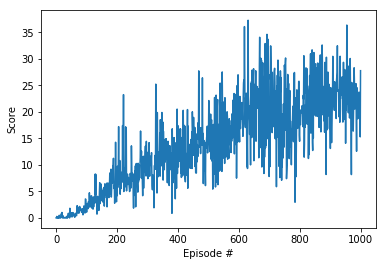

In [7]:
def ddpg(n_episodes=1000, max_t=1000):
    """ 
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
    scores_episode = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])

            
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(t, states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(Agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_episode

scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()

Trying the smart agent:

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
        
for agent in agents:
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

scores = np.zeros(num_agents)


for t in range(1000):
    actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):
        break 

print(scores)        
env.close()

## 3. Multi-Agent Environment

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.

Please select one of the two options below for loading the environment.

In [5]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')
env = UnityEnvironment(file_name='Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [7]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print(np.shape(states))
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
(20, 33)
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


In [5]:
#num_agents = 1
num_agents = 20
action_size = 4
state_size = 33

In [6]:
import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import deque
from ddpg_agent import Agent
#import workspace_utils

In [7]:
torch.__version__

'1.1.0'

Initializing the agents. Here, twenty agents are created.

In [8]:
agents =[] 
for i in range(num_agents):
    agents.append(Agent(state_size=state_size, action_size=action_size, random_seed=2))

Initialising ReplayBuffer


Initializing agents from the single-agent enviroment:

In [ ]:
for agent in agents:
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

Initializing agents, in case of restarting from a saved multi-agent checkpoint:

In [9]:
for agent in agents:
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor_multi.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic_multi.pth'))

The DDPG function implementation:

Episode 10	Score: 29.83	Average Score: 17.90.95

 Saving Actor/Critic NN Weights
Episode 20	Score: 28.76	Average Score: 23.96.81

 Saving Actor/Critic NN Weights
Episode 30	Score: 29.94	Average Score: 25.72.05

 Saving Actor/Critic NN Weights
Episode 40	Score: 30.67	Average Score: 27.02.11

 Saving Actor/Critic NN Weights
Episode 50	Score: 32.69	Average Score: 27.93.01

 Saving Actor/Critic NN Weights
Episode 60	Score: 30.33	Average Score: 28.47.83

 Saving Actor/Critic NN Weights
Episode 70	Score: 29.80	Average Score: 28.66.04

 Saving Actor/Critic NN Weights
Episode 80	Score: 27.12	Average Score: 28.59.60

 Saving Actor/Critic NN Weights
Episode 90	Score: 29.85	Average Score: 28.69.00

 Saving Actor/Critic NN Weights
Episode 100	Average Score: 28.663.42	max: 32.81
Episode 100	Score: 27.68	Average Score: 28.66

 Saving Actor/Critic NN Weights
Episode 110	Score: 28.82	Average Score: 29.7561

 Saving Actor/Critic NN Weights
Episode 120	Score: 31.19	Average Score: 29.9472

 Saving Actor/

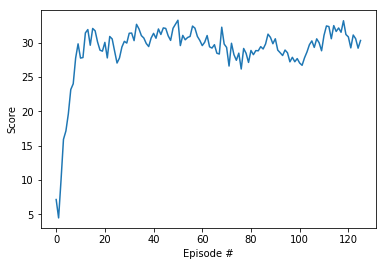

In [10]:
def ddpg(n_episodes=150, max_t=1000):
    """ 
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
    scores_episode = []
    
   
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
           
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            #actions = [agents[i].act(states[i]) for i in range(num_agents)]
            actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
#             if t == 0:
#                 print("actions", actions)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(t, states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            


        if i_episode % 10 == 0:
            print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
            torch.save(Agent.actor_local.state_dict(), 'checkpoint_actor_multi.pth')
            torch.save(Agent.critic_local.state_dict(), 'checkpoint_critic_multi.pth')
            print('\n Saving Actor/Critic NN Weights')
            
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'checkpoint_actor_multi.pth')
            torch.save(Agent.critic_local.state_dict(), 'checkpoint_critic_multi.pth')
            break
            
    return scores_episode


#from workspace_utils import active_session
 
#with active_session():
    # do long-running work here
scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Trying the smart agent:

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations
        
for agent in agents:
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor_multi.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic_multi.pth'))

scores = np.zeros(num_agents)


for t in range(1000):
    actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):
        break 

Closing the environment:

In [ ]:
env.close()